# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set(font_scale = 2)
# 그래프의 기본 스타일과 font크기를 설정하는 코드입니다.

In [2]:
import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic') # 그래프 한글 표시 깨짐 방지
mpl.rc('axes', unicode_minus = False) # 그래프 minus 표시 깨짐 방지

In [3]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

## Pclass

In [4]:
df_train[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [5]:
df_train[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


In [6]:
df_train[['Pclass', 'Survived']].groupby('Pclass').mean() * 100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [7]:
(pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True)
             .style
             .background_gradient(cmap = 'autumn_r'))

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0, 0.5, 'percent')

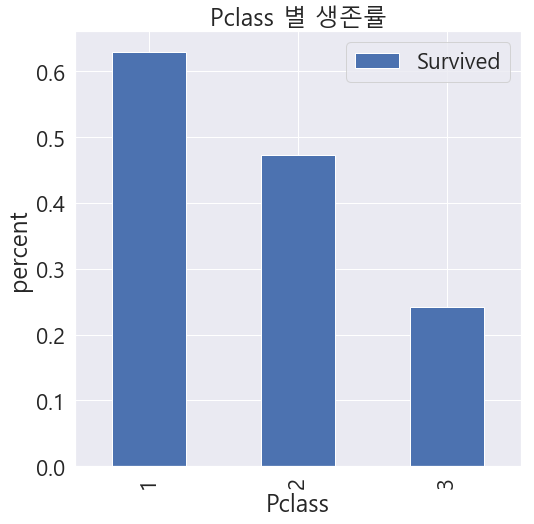

In [8]:
f, ax = plt.subplots(figsize = (8, 8))
df_train[['Pclass', 'Survived']]\
    .groupby('Pclass')\
    .mean()\
    .plot.bar(ax = ax)
ax.set_title('Pclass 별 생존률')
ax.set_ylabel('percent')

Text(0, 0.5, 'count')

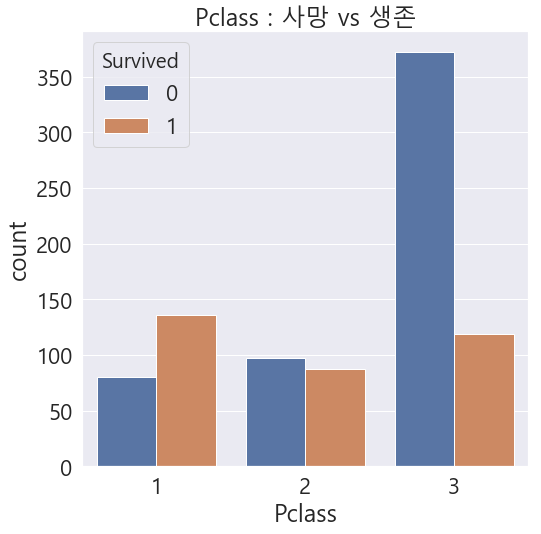

In [9]:
f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.countplot('Pclass', hue = 'Survived', # hue = '변수' : 변수 기준으로 나눔
              data = df_train, ax = ax)
ax.set_title('Pclass : 사망 vs 생존')
ax.set_ylabel('count')

## Sex

In [10]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True)\
            .style.background_gradient(cmap = 'spring_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Text(0.5, 1.0, '성별 간 생존/사망 수')

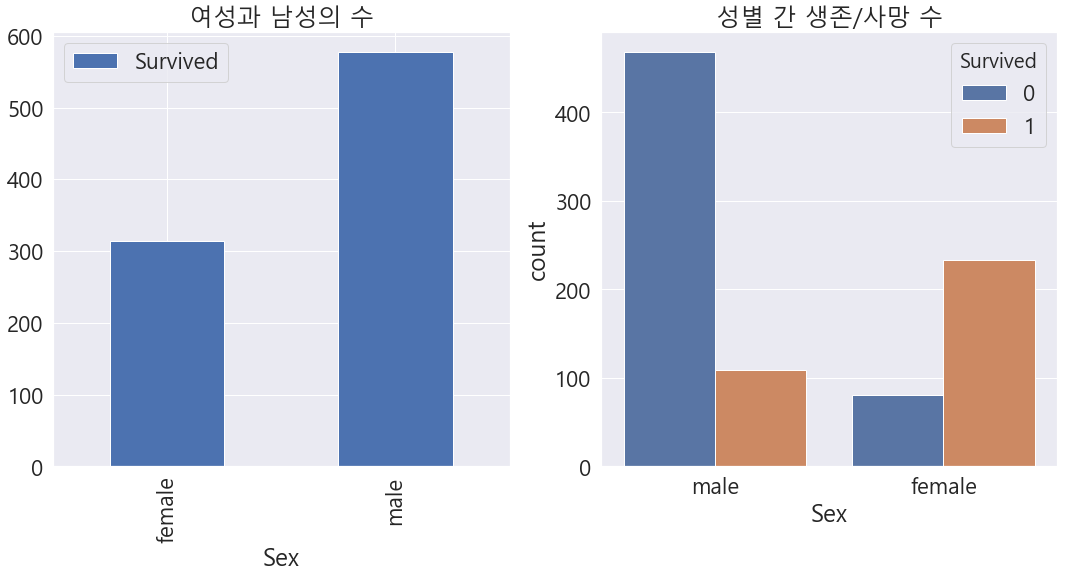

In [11]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
(df_train[['Sex', 'Survived']]
         .groupby('Sex')
         .count()
         .plot.bar(ax = ax[0]))
ax[0].set_title('여성과 남성의 수')
sns.countplot('Sex', hue = 'Survived',
              data = df_train, ax = ax[1])
ax[1].set_title('성별 간 생존/사망 수')

In [12]:
df_train[['Sex', 'Survived']].groupby('Sex').mean() * 100

,Survived
Sex,
female,74.203822
male,18.890815


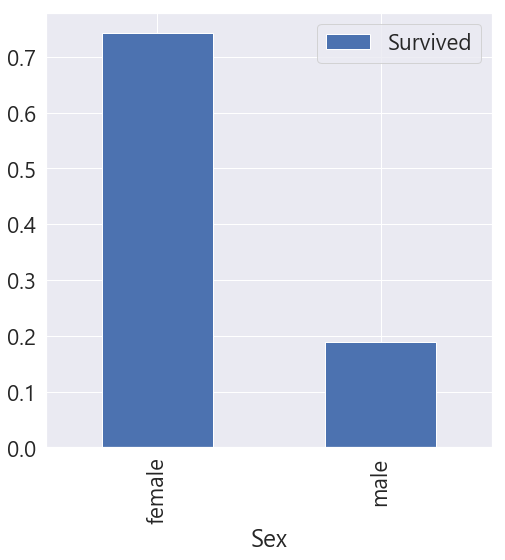

In [13]:
f, ax = plt.subplots(figsize = (8, 8))
(df_train[['Sex', 'Survived']]
     .groupby('Sex')
     .mean()
     .plot.bar(ax = ax))

## Sex와 Pclass

In [14]:
(pd.crosstab([df_train.Sex, df_train.Survived],
             df_train.Pclass, margins = True)
             .style.background_gradient(cmap = 'summer_r'))

In [15]:
(df_train[['Pclass', 'Sex', 'Survived']]
         .groupby(['Pclass', 'Sex'])
         .mean()) * 100

Survived
Pclass Sex              
1      female  96.808511
       male    36.885246
2      female  92.105263
       male    15.740741
3      female  50.000000
       male    13.544669

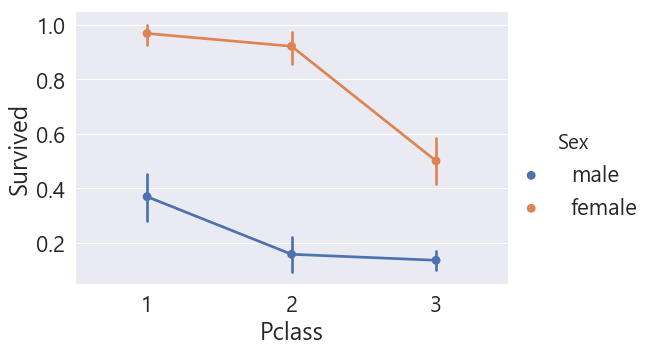

In [16]:
sns.factorplot('Pclass', 'Survived',
               hue = 'Sex', data = df_train, 
               size = 5, aspect = 1.5)

## Age

In [17]:
print('최소 나이 :', min(df_train['Age']),'세')
print('최대 나이 :', max(df_train['Age']),'세')
print('평균 나이 :', np.mean(df_train['Age']),'세')

최소 나이 : 0.42 세
최대 나이 : 80.0 세
평균 나이 : 29.69911764705882 세


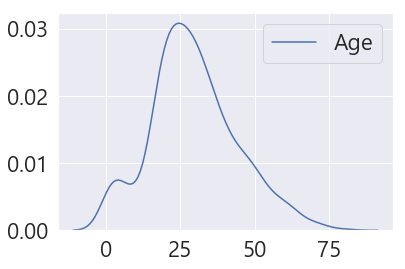

In [18]:
sns.kdeplot(df_train['Age'])

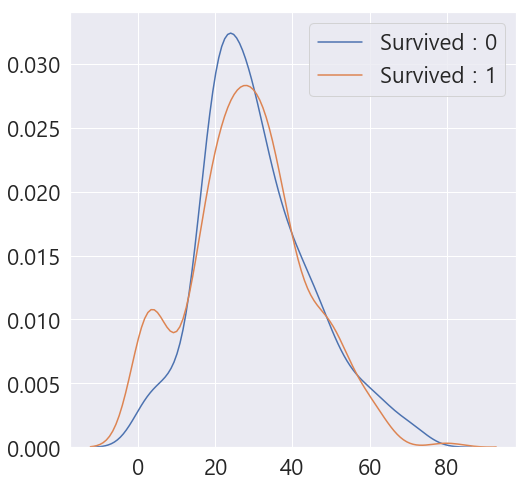

In [19]:
f, ax = plt.subplots(figsize = (8, 8))
for i in range(2):
    sns.kdeplot(df_train.loc[df_train['Survived'] == i, 'Age'], ax = ax)
plt.legend(['Survived : 0', 'Survived : 1'])

# Sex, Pclass, Age

Text(0.5, 1.0, 'Sex and Age vs Survived')

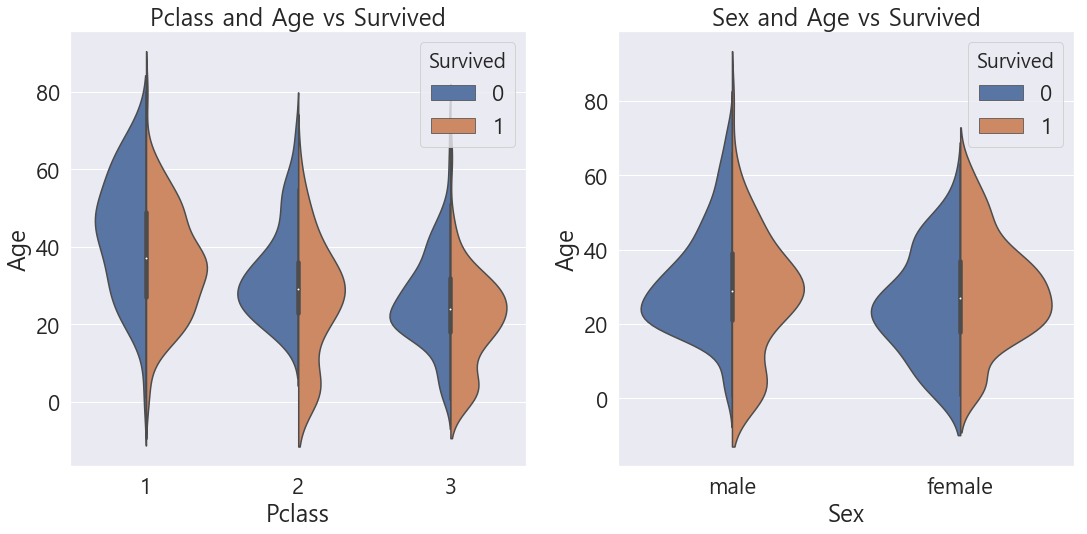

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived',
               data = df_train,
               split = True, # False시 두개의 분포를 따로 나타냄
               ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
sns.violinplot('Sex', 'Age', hue = 'Survived',
               data = df_train,
               split=True,
               ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')

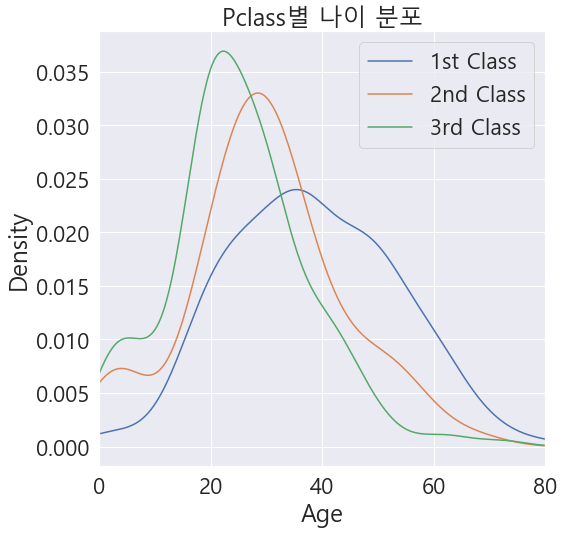

In [21]:
plt.figure(figsize = (8, 8))
for i in range(1,4):
    df_train.loc[df_train['Pclass'] == i, 'Age'].plot(kind = 'kde')
plt.xlabel('Age')
plt.xlim(0, 80)
plt.title('Pclass별 나이 분포')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

Text(0.5, 0, 'Age')

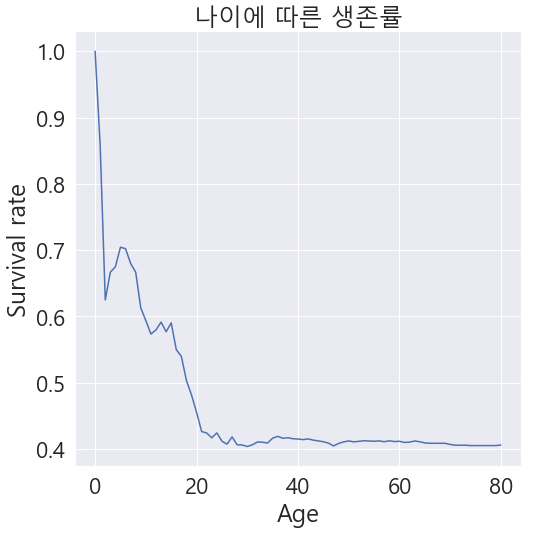

In [22]:
cum_rate = []
for i in range(1, 82): # 최소 나이가 1살보다 적고, 최대 나이가 80이므로 80을 포함할 수 있는 82까지 설정
    cum_rate\
    .append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
plt.figure(figsize = (8, 8))
plt.plot(cum_rate)
plt.title('나이에 따른 생존률', y = 1)
plt.ylabel('Survival rate')
plt.xlabel('Age')

## Embarked

In [23]:
(pd.crosstab(df_train['Embarked'],
             df_train['Survived'],
             margins = True)
            .style.background_gradient(cmap = 'winter_r'))

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [24]:
(df_train[['Embarked', 'Survived']]
        .groupby('Embarked').mean()) * 100

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.695652


Text(0.5, 1.0, '항구 별 생존률')

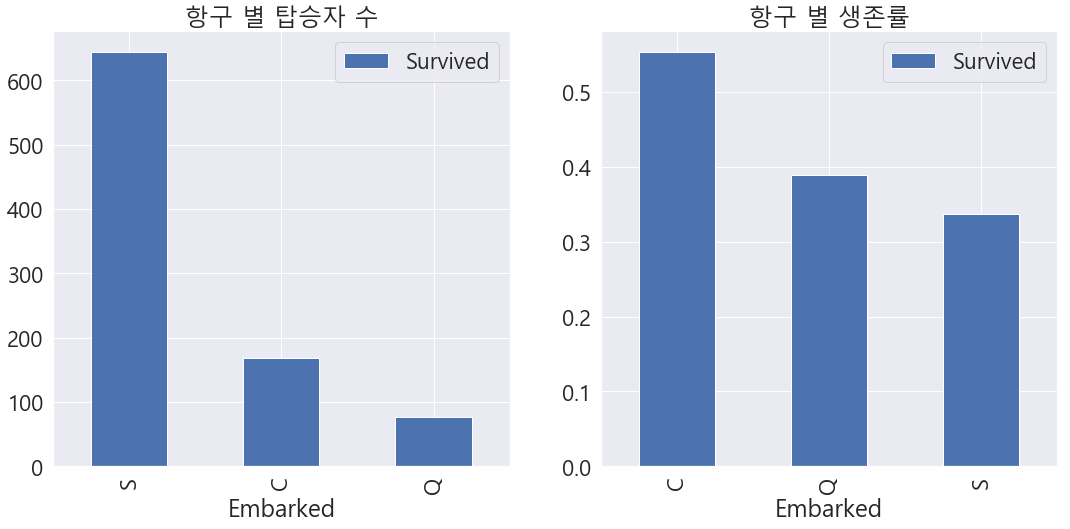

In [25]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
(df_train[['Embarked', 'Survived']]
         .groupby('Embarked')
         .count()
         .sort_values(by = 'Survived', ascending = False) # Survived를 내림차순으로 정렬
         .plot.bar(ax = ax[0]))
ax[0].set_title('항구 별 탑승자 수')
(df_train[['Embarked', 'Survived']]
         .groupby('Embarked')
         .mean()
         .plot.bar(ax = ax[1]))
ax[1].set_title('항구 별 생존률')

In [26]:
(pd.crosstab([df_train.Embarked, df_train.Pclass],
             [df_train.Sex, df_train.Survived], margins = True)
             .style.background_gradient(cmap='summer_r'))

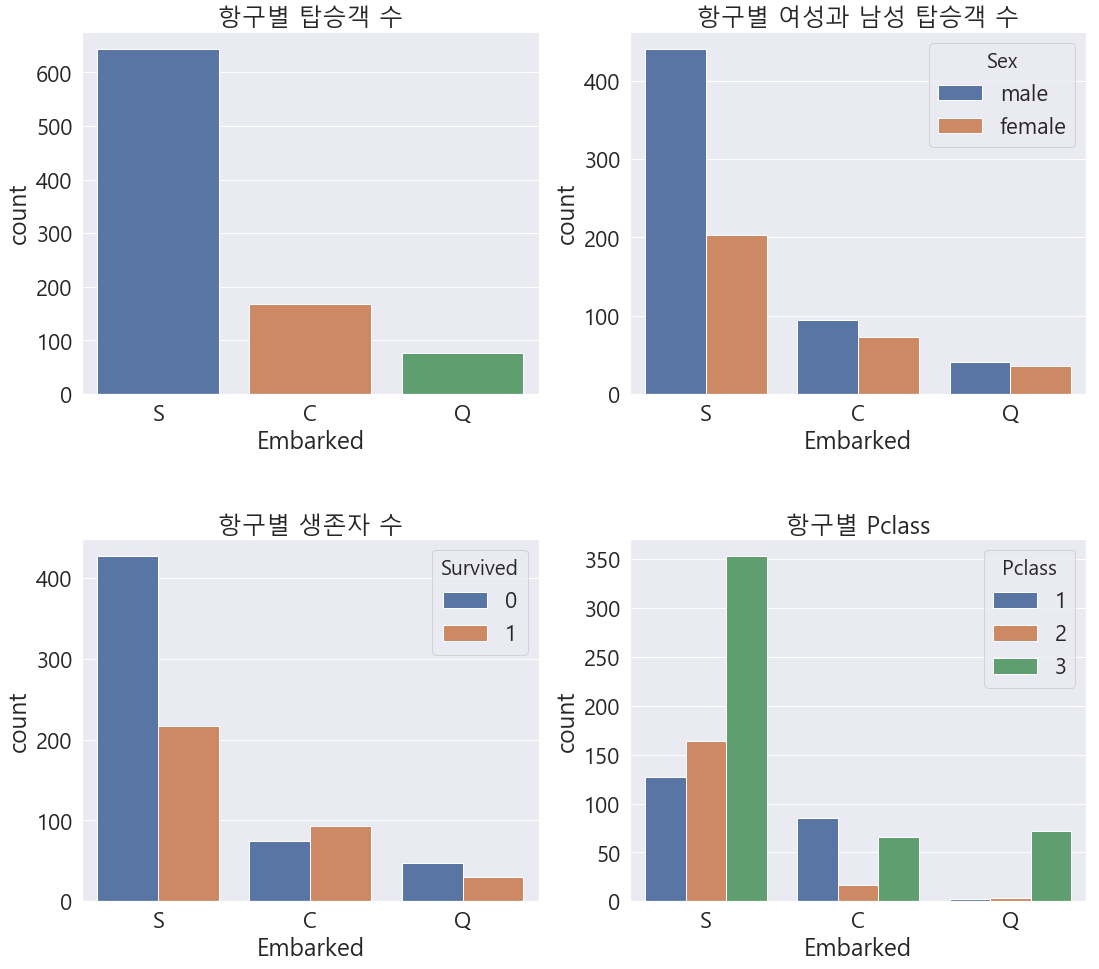

In [27]:
f, ax = plt.subplots(2, 2, figsize = (18, 16))
sns.countplot('Embarked', data = df_train, ax = ax[0, 0])
sns.countplot('Embarked', hue = 'Sex', data = df_train, ax = ax[0, 1])
sns.countplot('Embarked', hue = 'Survived', data = df_train, ax = ax[1, 0])
sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax = ax[1, 1])
ax[0, 0].set_title('항구별 탑승객 수')
ax[0, 1].set_title('항구별 여성과 남성 탑승객 수')
ax[1, 0].set_title('항구별 생존자 수')
ax[1, 1].set_title('항구별 Pclass')

plt.subplots_adjust(wspace = 0.2, # 그래프 간 넓이 조정
                    hspace = 0.4) # 그래프 간 높이 조정

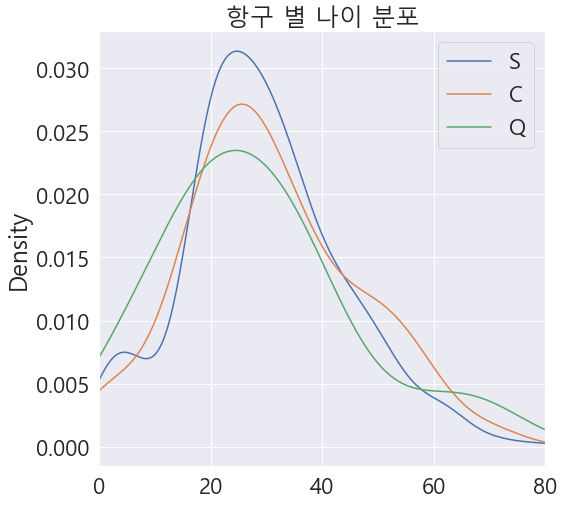

In [28]:
plt.figure(figsize = (8, 8))
labels = ['S', 'C', 'Q']
for i in labels:
    df_train.loc[df_train['Embarked'] == i, 'Age'].plot(kind = 'kde')
plt.title('항구 별 나이 분포')
plt.xlim(0, 80)
plt.legend(labels)

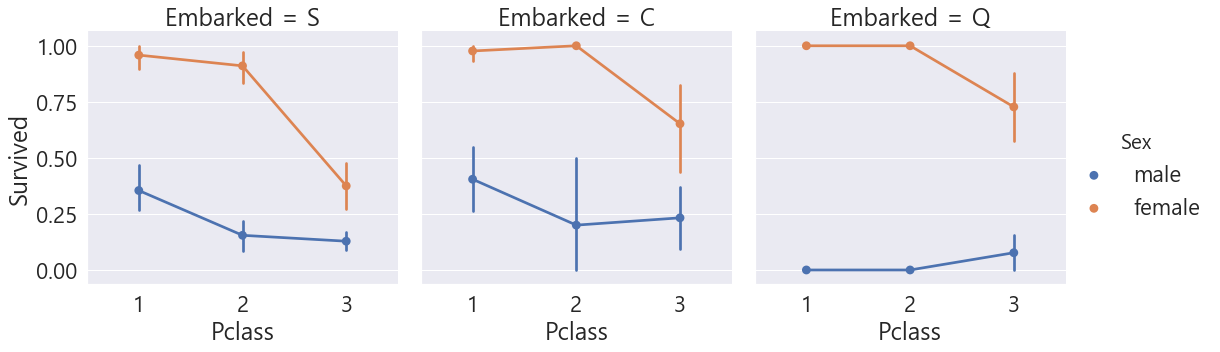

In [29]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = df_train)

## SibSp

In [30]:
(pd.crosstab([df_train.SibSp], df_train.Survived)
        .style.background_gradient(cmap='summer_r'))

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


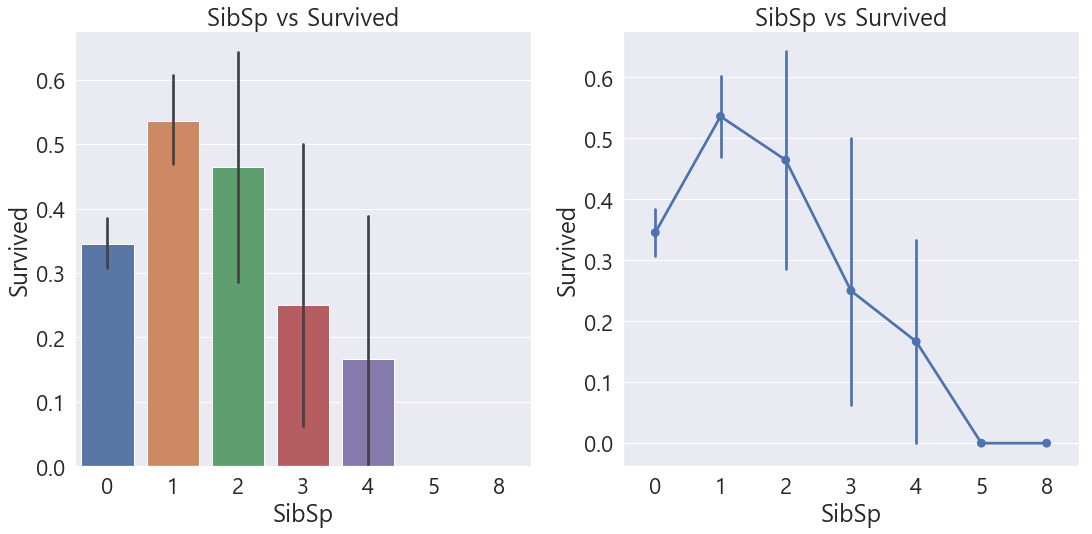

In [31]:
f , ax = plt.subplots(1, 2, figsize = (18, 8))
sns.barplot('SibSp', 'Survived', data = df_train, ax = ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)

In [32]:
(pd.crosstab(df_train.SibSp, df_train.Pclass, margins = True)
    .style.background_gradient(cmap = 'summer_r'))

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


## Parch

In [33]:
(pd.crosstab(df_train['Parch'], df_train['Pclass'])
    .style.background_gradient(cmap = 'RdBu'))

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


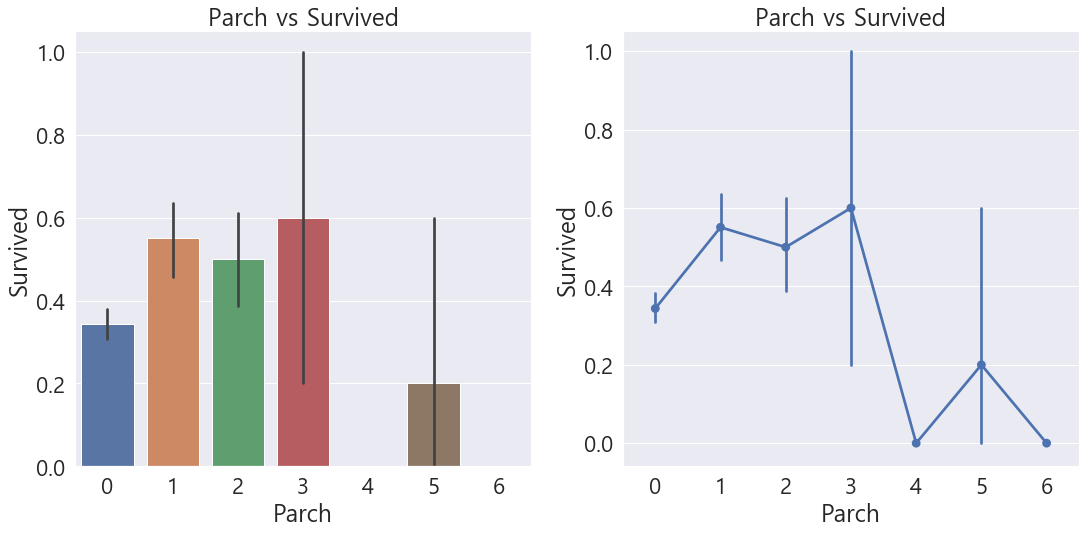

In [34]:
f , ax = plt.subplots(1, 2, figsize = (18, 8))
sns.barplot('Parch', 'Survived', data = df_train, ax = ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)

## Fare

In [35]:
print('가장 비싼 탑승료:', df_train['Fare'].max())
print('가장 싼 탑승료:', df_train['Fare'].min())
print('평균 탑승료:', df_train['Fare'].mean())

가장 비싼 탑승료: 512.3292
가장 싼 탑승료: 0.0
평균 탑승료: 32.2042079685746


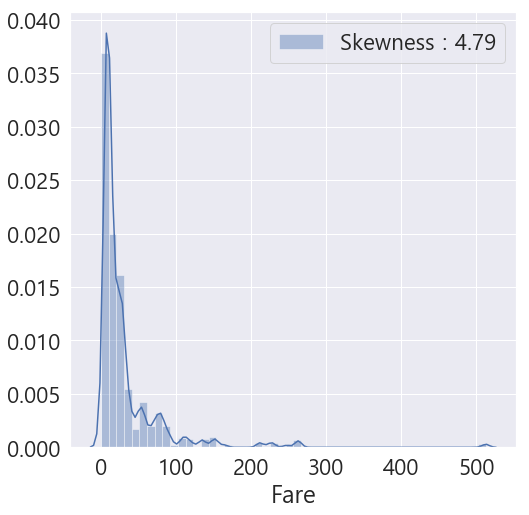

In [36]:
f, ax = plt.subplots(figsize = (8, 8))
(sns.distplot(df_train['Fare'], color = 'b',
             label = 'Skewness : {:.2f}'       # skewnsee는 왜도
             .format(df_train['Fare'].skew()),
              ax = ax))
ax.legend()

Text(0.5, 1.0, 'Fares in Pclass 3')

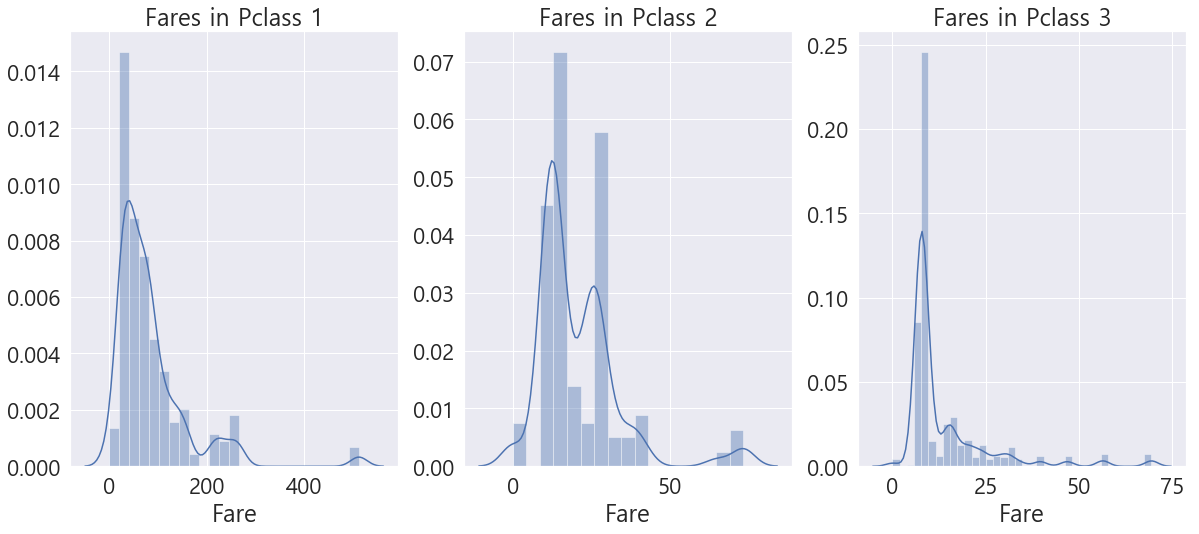

In [37]:
f, ax = plt.subplots(1, 3, figsize = (20, 8))
for i in range(3):
    sns.distplot(df_train.loc[df_train['Pclass'] == i+1].Fare, ax = ax[i])
ax[0].set_title('Fares in Pclass 1')
ax[1].set_title('Fares in Pclass 2')
ax[2].set_title('Fares in Pclass 3')

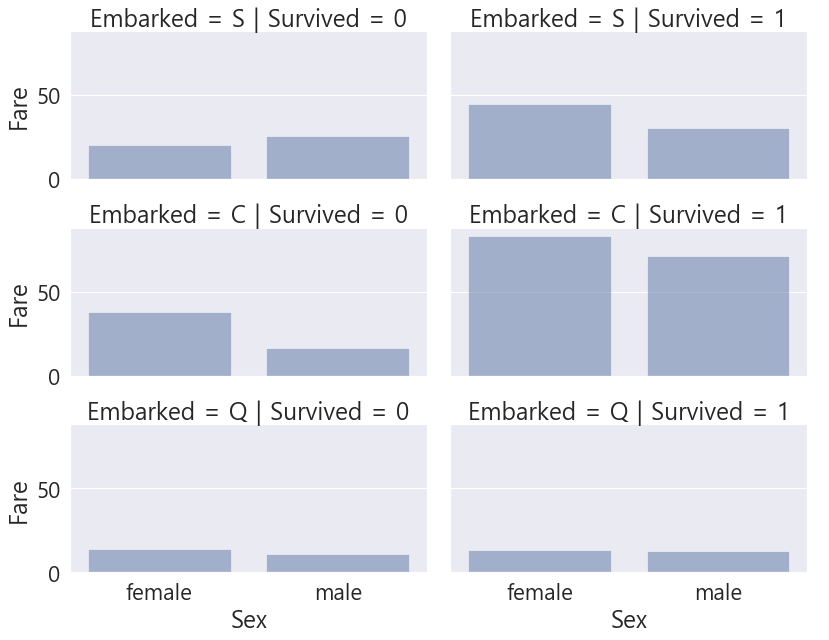

In [38]:
(sns.FacetGrid(df_train, row='Embarked', col='Survived', size = 3, aspect = 1.9)
    .map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
    .add_legend())

## Correlation

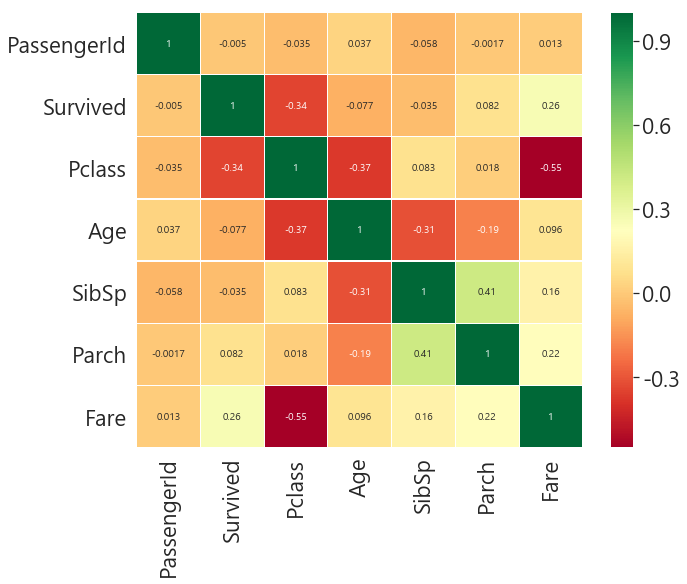

In [39]:
f, ax = plt.subplots(figsize = (10, 8))
(sns.heatmap(df_train.corr(),
             annot = True, # 네모 블럭안에 상관 계수 표시
             cmap = 'RdYlGn',
             linewidths = 0.2,
             ax = ax))

여기까지 정리!

1. 클래스가 높을 수록 성별이 여성일수록 생존률이 높아집니다.
2. 또한 탑승료의 값이 높을수록 생존에 유리함으로 보입니다.
3. 나이가 어릴수록 생존할 확률이 올라갑니다.
4. 혼자인것보다 가족구성원이 1명 내지 2명일 경우 생존이 올라갑니다. 하지만, 그보다 많은 경우에는 생존률이 감소합니다.
5. Q 항구의 탑승객들은 주로 3등급의 인원들로 구성돼 있고, S 항구의 탑승객들은 모든 등급의 사람들이 많이 탑승했습니다.
6. Parch와 SibSp의 변수가 유사한 특성을 보이고 있어, 두 변수를 합해 새로운 feature를 만드는 것도 좋아 보입니다.